In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix 
import itertools

In [135]:
base_skin_dir=os.path.join('..','input')
imageid_path_dict={os.path.splitext(os.path.basename(x))[0]:x 
for x in glob(os.path.join(base_skin_dir,'*','*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [136]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

# Creating New Columns for better readability

skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [137]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,..\input\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,2


In [138]:
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [139]:
skin_df['age'].fillna((skin_df['age'].mean()),inplace=True)

In [140]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [141]:
print(skin_df.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object


<AxesSubplot:>

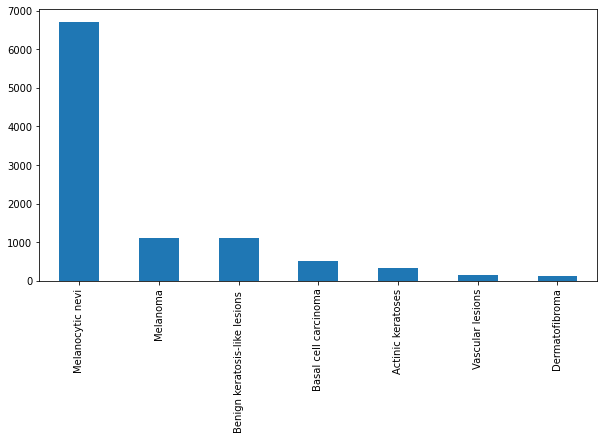

In [142]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar',ax=ax1)

In [143]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(skin_df['dx'])
skin_df['label']=le.transform(skin_df['dx'])
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [144]:
le1=LabelEncoder()
le1.fit(skin_df['sex'])
skin_df['gender']=le1.transform(skin_df['sex'])
print(list(le1.classes_))

['female', 'male', 'unknown']


In [145]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,label,gender
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,2,2,1
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,2,2,1
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,2,2,1
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,2,2,1
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,..\input\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,2,2,1


<AxesSubplot:>

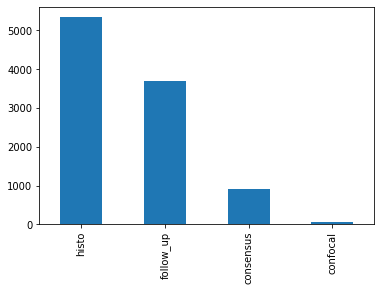

In [146]:
skin_df['dx_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

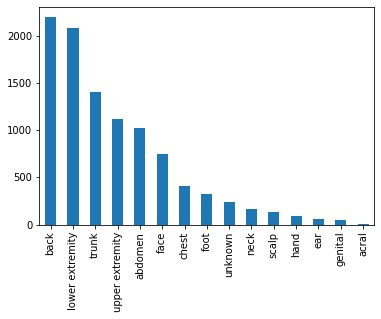

In [147]:
skin_df['localization'].value_counts().plot(kind='bar')

<AxesSubplot:>

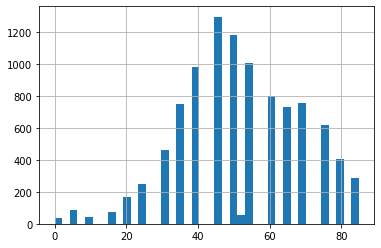

In [148]:
skin_df['age'].hist(bins=40)

C:\Users\Akshat\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='cell_type_idx'>

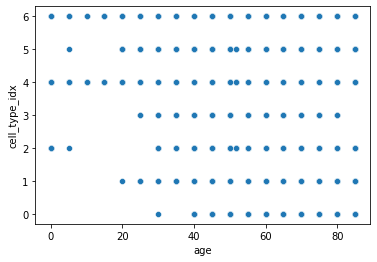

In [149]:
sns.scatterplot('age','cell_type_idx',data=skin_df)


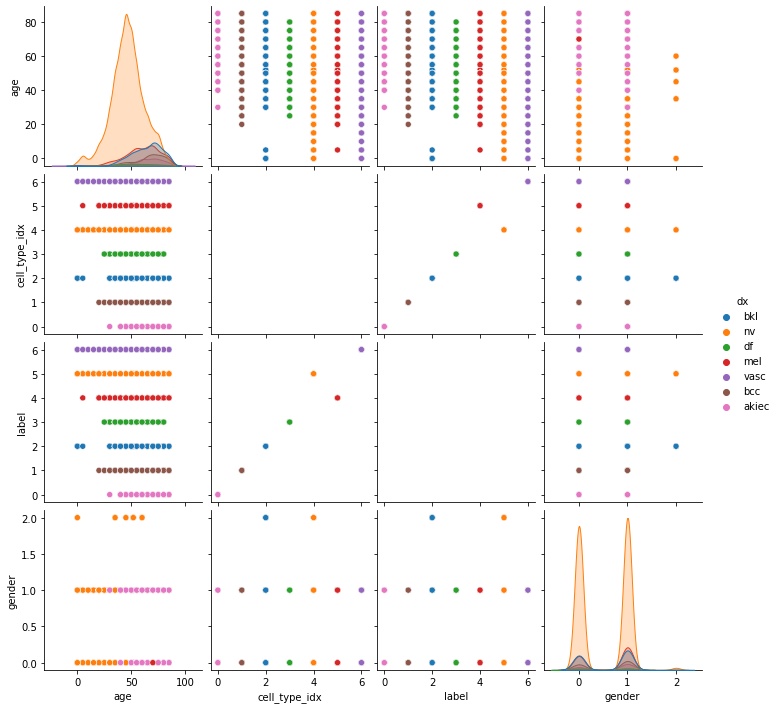

In [150]:
sns.pairplot(skin_df,hue='dx')

C:\Users\Akshat\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Akshat\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


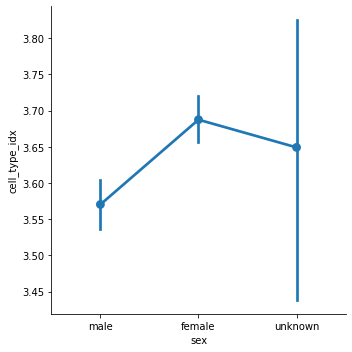

In [151]:
sns.factorplot('sex','cell_type_idx',data=skin_df)

In [152]:
pd.unique(skin_df.sex)

array(['male', 'female', 'unknown'], dtype=object)

In [153]:
pd.unique(skin_df.dx)

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

<AxesSubplot:>

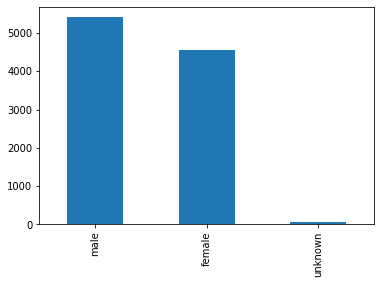

In [154]:
skin_df['sex'].value_counts().plot(kind='bar')

In [155]:
##skin_df=skin_df.drop(skin_df[skin_df['sex']=='unknown'],inplace=True,axis=1)

In [156]:
##skin_df.head()

In [157]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((64,64))))

In [158]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,label,gender,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,2,2,1,"[[[191, 152, 194], [191, 153, 195], [192, 149,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,2,2,1,"[[[23, 13, 23], [25, 14, 28], [37, 24, 46], [6..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,2,2,1,"[[[186, 129, 140], [192, 136, 151], [198, 143,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,2,2,1,"[[[24, 11, 19], [36, 20, 30], [64, 38, 50], [9..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,..\input\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,2,2,1,"[[[139, 95, 118], [158, 114, 138], [178, 133, ..."


In [159]:
skin_df['f1']=skin_df['image'].map(lambda x: 0.2989*x[:,:,0]+0.5870*x[:,:,1]+0.1140*x[:,:,2])
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,label,gender,image,f1
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,2,2,1,"[[[191, 152, 194], [191, 153, 195], [192, 149,...","[[168.42989999999998, 169.13089999999997, 166...."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,2,2,1,"[[[23, 13, 23], [25, 14, 28], [37, 24, 46], [6...","[[17.127699999999997, 18.8825, 30.3913, 52.040..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,2,2,1,"[[[186, 129, 140], [192, 136, 151], [198, 143,...","[[147.2784, 154.4348, 161.0212, 159.6191999999..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,..\input\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,2,2,1,"[[[24, 11, 19], [36, 20, 30], [64, 38, 50], [9...","[[15.796600000000002, 25.9204, 47.1356, 69.926..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,..\input\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,2,2,1,"[[[139, 95, 118], [158, 114, 138], [178, 133, ...","[[110.76409999999998, 129.87619999999998, 149...."


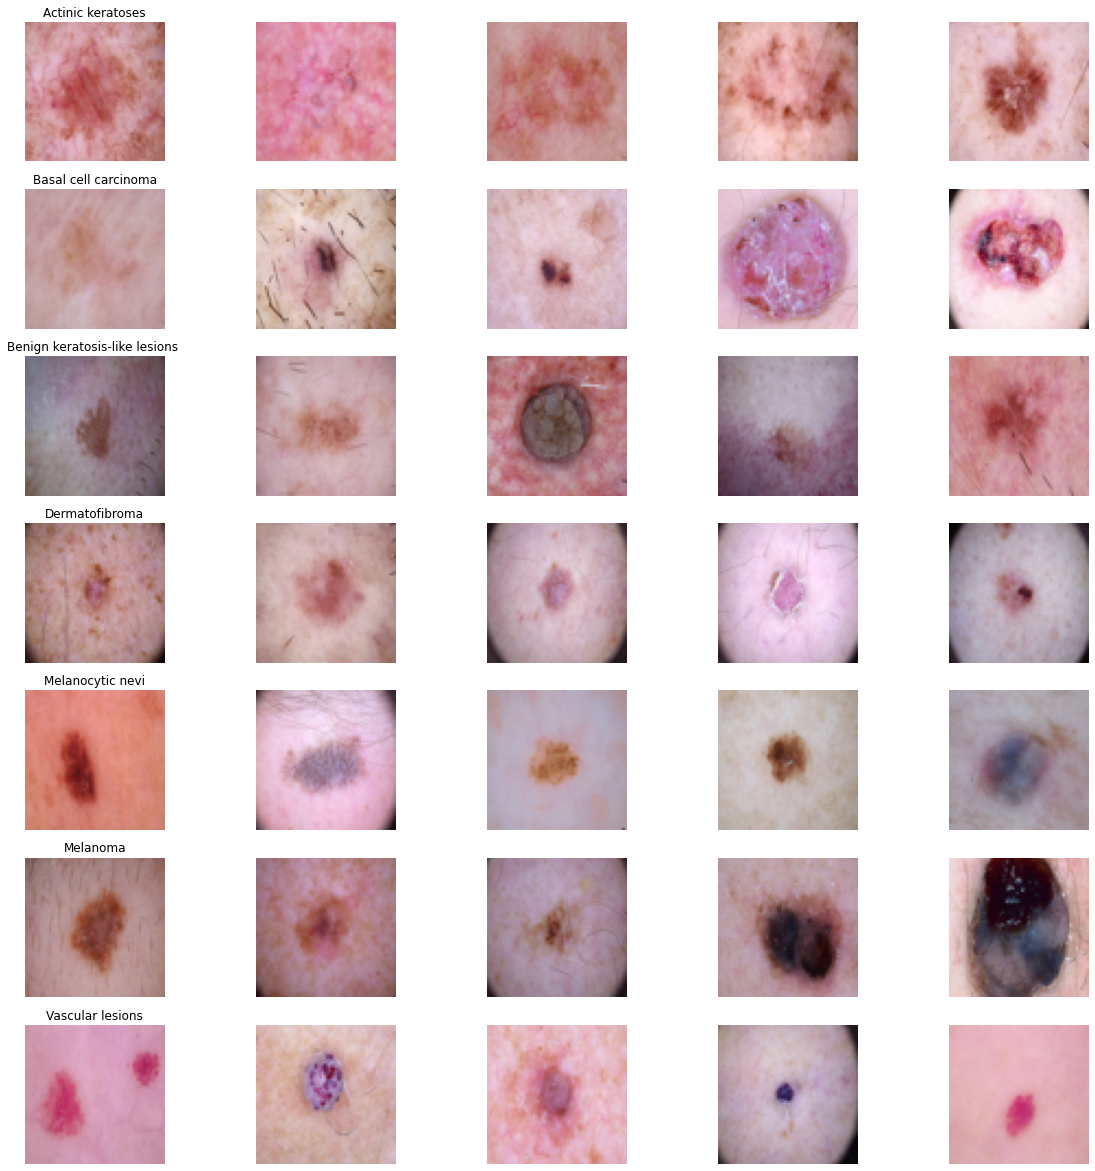

In [160]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

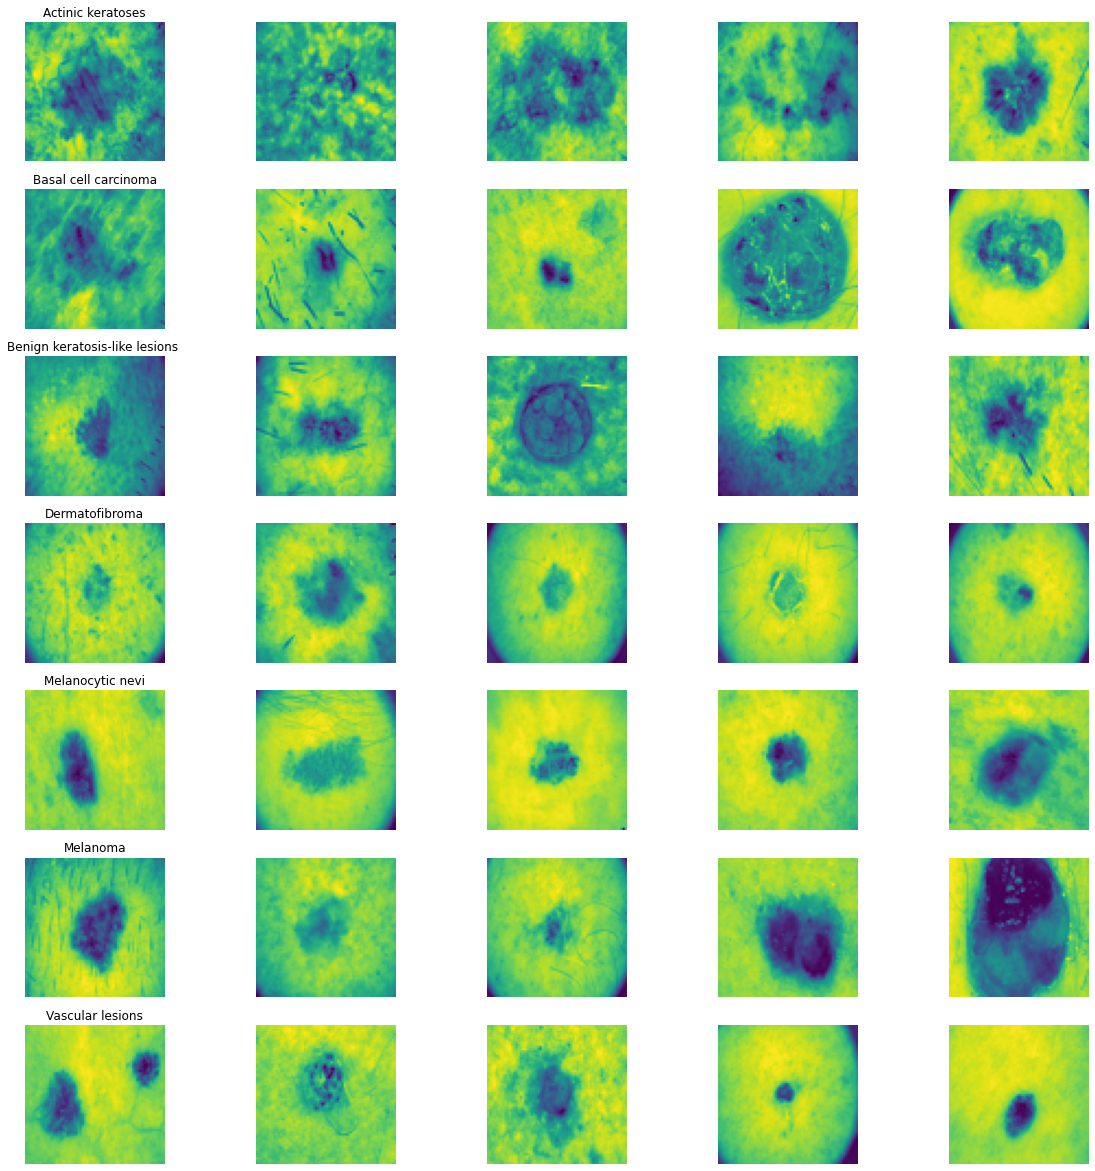

In [161]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['f1'])
        c_ax.axis('off')
fig.savefig('category_samples1.png', dpi=300)

skin_df['image'].map(lambda x: x.shape).value_counts()

skin_df.head()

X=np.asarray(skin_df['image'].tolist())
X=X/255